# EB Step 4: 1D Burgers Equation

See pages 25 to 26 in notebook

This is the combination of the heat diffusion equation with non-linear convection in 1D.
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

The resolves to the iterating equation as:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

## Initial and Boundary Conditions:

A different set of B.Cs and I.Cs are being used in this problem..... (copied) ...

Our initial condition for this problem is going to be:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

This has an analytical solution, given by:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Our boundary condition will be:

$$u(0) = u(2\pi)$$

This is called a *periodic* boundary condition. Pay attention! This will cause you a bit of headache if you don't tread carefully.

*Note to self: Work out the analytical solution on paper*

## Using SymPy to speed things up
SymPy is a symbolic mathematical toolbox. https://www.sympy.org/en/

In [1]:
import numpy
import sympy

In [2]:
from sympy import init_printing
init_printing(use_latex = True)

In [10]:
# First the set-up the symbolic variables for the three variables from the initial condition
# these were: nu, phi, and x.
x , nu, t = sympy.symbols('x nu t')

# Now define phi using the symbols
phi = sympy.exp((-(x - 4 * t)**2) / (4*nu*(t + 1))) + sympy.exp(-(x - 4*t -2*sympy.pi)**2 / (4*nu*(t+1)))
phi

Now evaluate the partial derivative of $\frac{\partial \phi}{\partial x}$

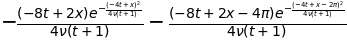

In [11]:
phiprime = phi.diff(x)
phiprime

In [12]:
# the un-rendered version is accesible using the print functions
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


### Now what?(copied)


Now that we have the Pythonic version of our derivative, we can finish writing out the full initial condition equation and then translate it into a usable Python expression.  For this, we'll use the *lambdify* function, which takes a SymPy symbolic equation and turns it into a callable function.  

Recall:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\end{eqnarray}

In [13]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


### Lambdify

To lambdify this expression into a useable function, we tell lambdify which variables to request and the function we want to plug them in to.

In [14]:
ufunc = lambdify((t , x, nu), u) # lambdify((RHS terms), LHS term)
# t = 1, x = 4, nu = 3
print (ufunc(1, 4, 3))

3.49170664206445


## Back to Burgers Equation
Now that the ICs have been defined we can now finish setting up the problem, and then generate a plot of the initial conditions using the *lambdify* function.

In [15]:
from matplotlib import pyplot
%matplotlib inline

###variable declarations
nx = 101
nt = 100
# recall boundary conditions of u(0) = u(2pi), therefore dx = 2*pi/(nx-1)
dx = 2 * numpy.pi / (nx - 1)
nu = 0.07 # viscosity
dt = dx * nu

x = numpy.linspace(0, 2 *numpy.pi, nx)
un = numpy.empty(nx) #temporary u step variable
t = 0 # start time, will increase for analytical solution by dt for each time step we want to plot

 # use in-line python loop to get analytical solution of u at time step 0.
u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

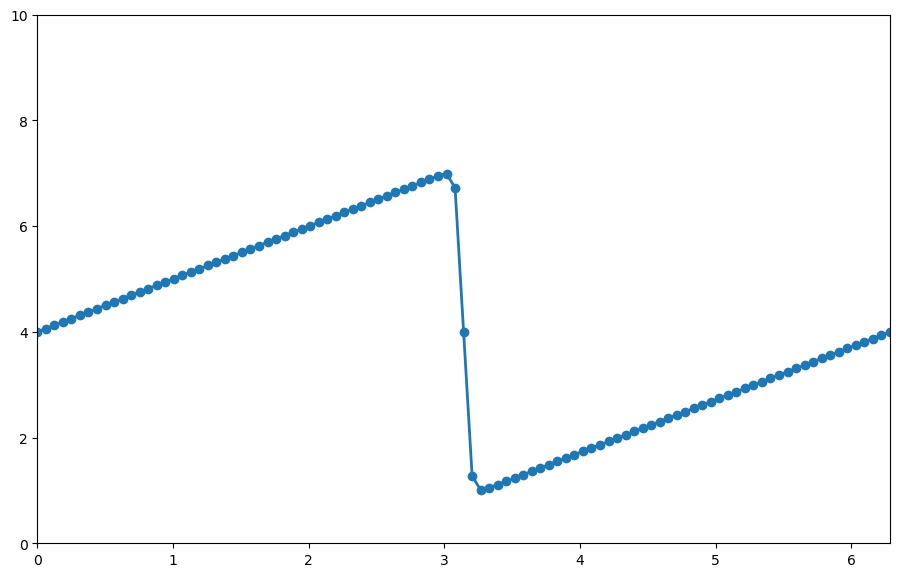

In [20]:
### now plot the initial conditions
pyplot.figure(figsize=(11,7), dpi = 100)
pyplot.plot(x, u, marker='o',lw=2)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]); #note semi-colon to close pyplot formatting

This is known as a *saw-tooth function*, and is our intitial condition.
(Recall Burgers equation can exhibit shockwaves)

## Periodic Boundary Conditions
In the previous steps, as the time of the simulation or the speed of the wave are increased, the result moves off the plot of the graph. In this scenario with periodic boundary coniditons the result will wrap back around on itself.

Discretization:
$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

If the B.C.s are cylical, then u_{i+1}^n when i = nx (the end) would imply that $u_{i = nx+1}^n = u_{i = 1}^n$

In [21]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i]*(dt/dx)*(un[i]-un[i-1]) + nu*(dt/dx**2)*(un[i+1] - 2*un[i] + un[i-1])
    # i = nx -1, i.e. @ the end
    u[0] = un[0] - un[0]*(dt/dx)*(un[0]-un[-2]) + nu*(dt/dx**2)*(un[1] - 2*un[0] + un[-2])
    u[-1] = u[0]

u_analytical = numpy.asarray([ufunc(nt*dt, xi, nu) for xi in x])

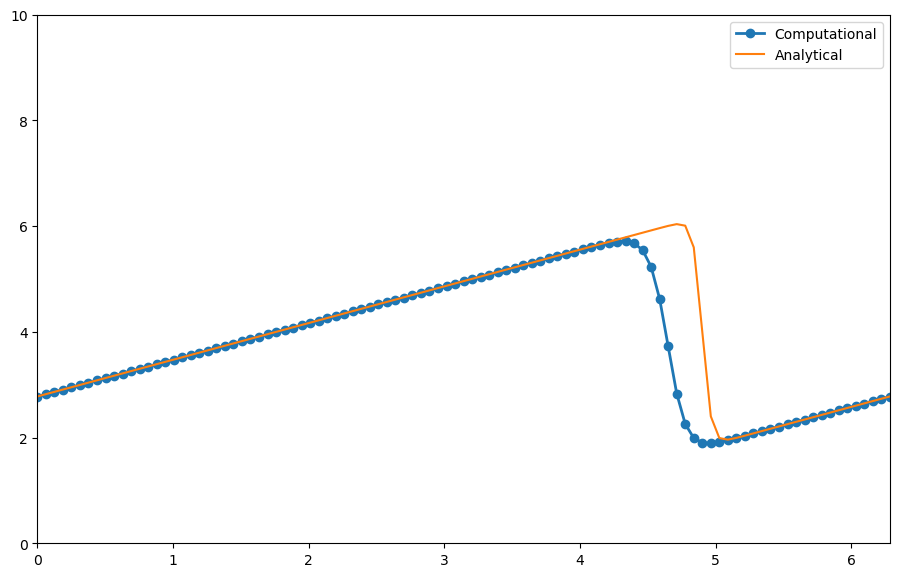

In [22]:
pyplot.figure(figsize=(11,7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label = 'Computational')
pyplot.plot(x,u_analytical, label = 'Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [23]:
u_IC = numpy.asarray([ufunc(t, x0, nu) for x0 in x])

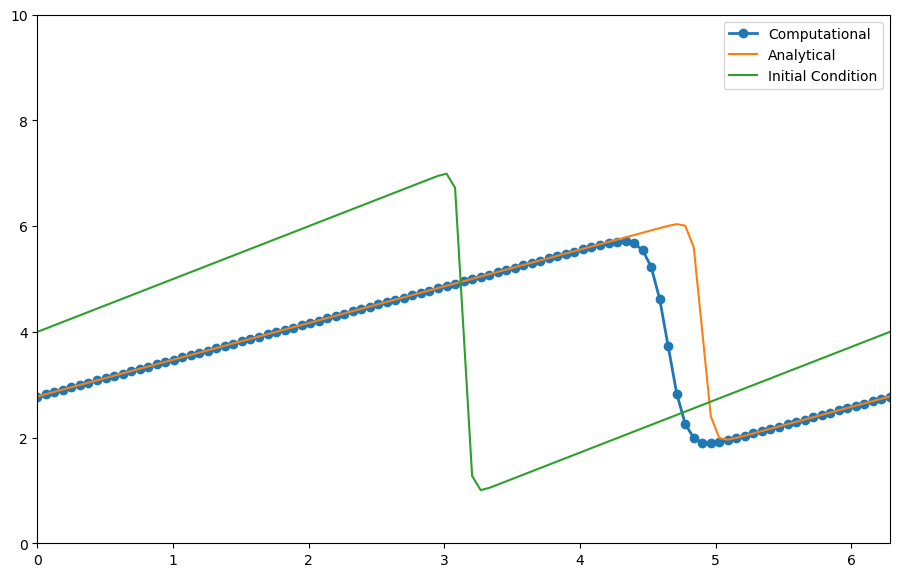

In [25]:
pyplot.figure(figsize=(11,7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label = 'Computational')
pyplot.plot(x,u_analytical, label = 'Analytical')
pyplot.plot(x,u_IC, label= 'Initial Condition')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();